# Advanced Pandas

### Colours dataset
---

In [3]:
# Import statements

import pandas as pd

df = pd.read_csv("./data/colors.csv")

In [4]:
# Initial checks
df.head()       # Needs to adjust the column names
df.shape
df.columns
df.dtypes

# Adjustments
df.columns = ["ID", "NAME", "RGB", "IS_TRANS"]
df.head()

,ID,NAME,RGB,IS_TRANS
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


#### Challenge
Read the colors.csv file from the data folder and find the total number of unique colours.

In [5]:
# Drop na argument means it tells pandas not to ignore the nan values
df["NAME"].nunique(dropna=False)

135

Also, figure out how many of the LEGO colours are transparent compared to how many colours are opaque.

In [6]:
df[df["IS_TRANS"]=="t"].count()         # Count is the number of valid nan entires

# Or
df.groupby("IS_TRANS").count()

# or
df["IS_TRANS"].value_counts()           # Breakdown of how each unique value appears

IS_TRANS
f    107
t     28
Name: count, dtype: int64

### Sets Dataset
---

In [7]:
sets_df = pd.read_csv("./data/sets.csv")

In [8]:
# Initial checks
sets_df.head()
sets_df.columns         # Columns need to be changed but its fine for practive
sets_df.dtypes
sets_df.shape

# Adjustments section --- T

(15710, 5)

In [9]:
# Missing valies
sets_df.isna().sum()

    # Can drop the values or fill it
    #  In this case there are no missing values


# Run descriptive statistics section

set_num      0
name         0
year         0
theme_id     0
num_parts    0
dtype: int64

#### Challenge
---

In which year were the first LEGO sets released and what were these sets called?

In [10]:
min_index= sets_df["year"].idxmin()
name = sets_df.loc[min_index,"name"]
year = sets_df.loc[min_index,"year"]
f" The first lego sets were released in {year}. it was called {name}"

' The first lego sets were released in 1949. it was called Extra-Large Gift Set (ABB)'

How many different products did the LEGO company sell in their first year of operation?

In [11]:
sets_df["name"].nunique()

13437

What are the top 5 LEGO sets with the most number of parts?

In [12]:
sets_df.sort_values(ascending=False, by= "num_parts").head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


#### Use of the agg function
---

In [13]:
# Better than the group function with one type of output---- which can only do one thing at a time. Agg allows you to do multiple operations on different columns.

themes_by_year = sets_df.groupby("year").agg({"theme_id":"nunique"})

### Visualising the data( Matplotlib ---> static)

In [14]:
import matplotlib.pyplot as plt

Now, let's create a new Series called sets_by_year which has the years as the index and the number of sets as the value. The result should look something like this:

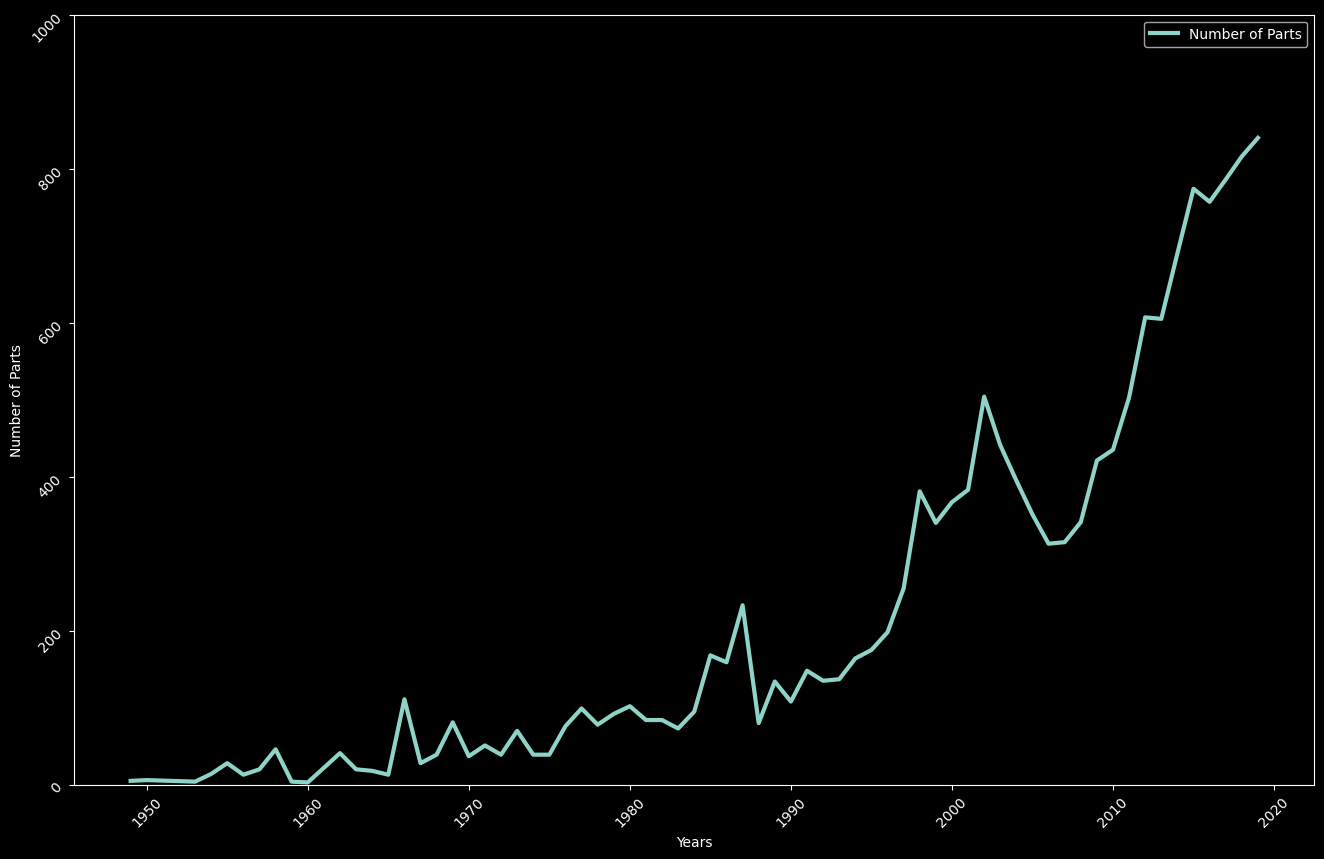

In [15]:
sets_by_year = sets_df.groupby("year").count()
sets_by_year.head()


# Visualising the data
    # Sizing of the graph
plt.figure(figsize= (16, 10))
plt.xticks(fontsize= 10, rotation = 45 )
plt.yticks(fontsize= 10, rotation = 45 )

    # Drawing the graph
plt.plot(sets_by_year.index[: -2],
         sets_by_year["num_parts"][: -2],
         linewidth = 3,
         label = "Number of Parts")


    # Final labels
plt.xlabel("Years", fontsize = 10)
plt.ylabel("Number of Parts", fontsize = 10)
plt.ylim(0, 1000)
plt.legend(fontsize = 10)


Create a line plot of the number of themes released year-on-year. Only include the full calendar years in the dataset (1949 to 2019).

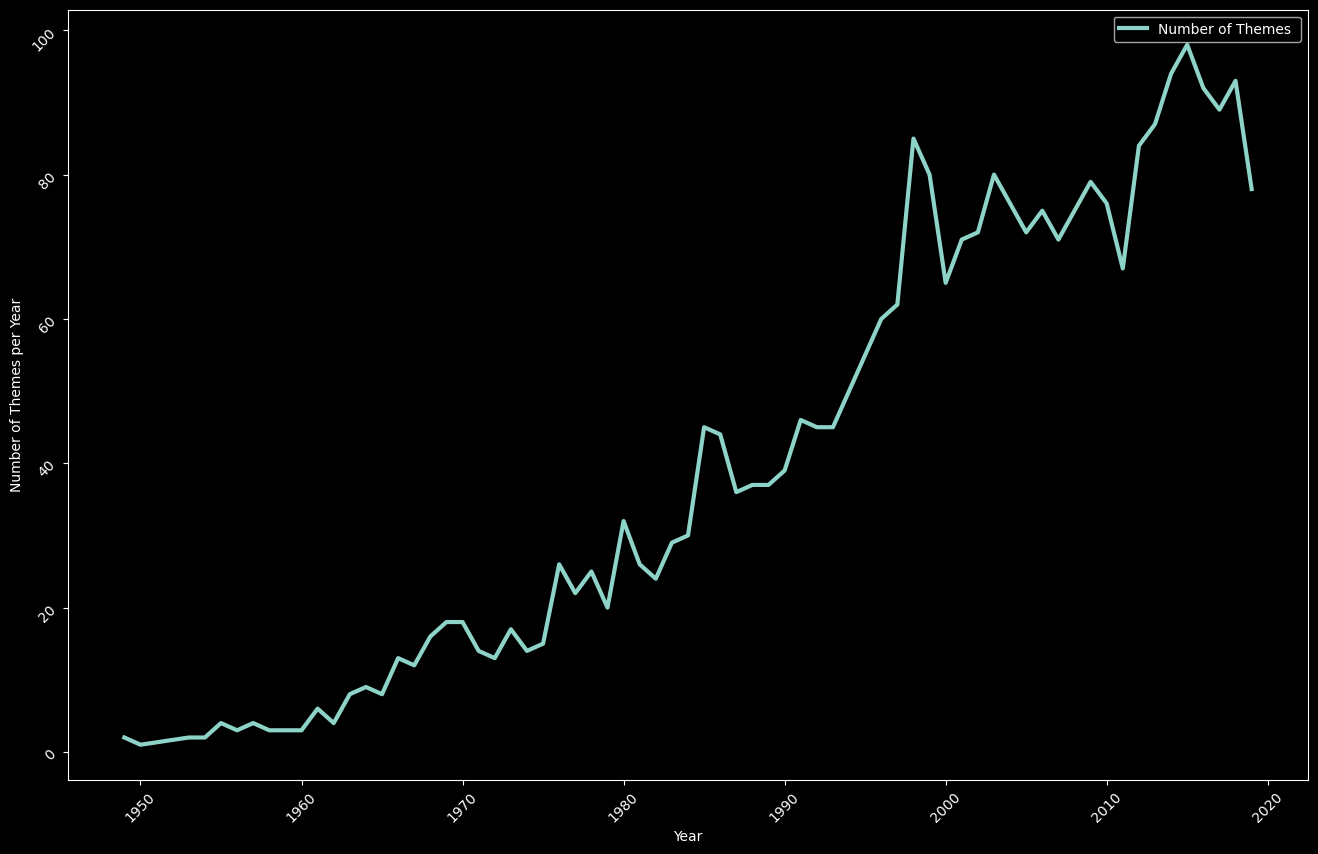

In [16]:
# Visualize the themes data

    # Creating the structure
plt.figure(figsize= (16, 10))
plt.xticks( fontsize= 10, rotation = 45 )
plt.yticks(fontsize= 10, rotation = 45 )

    # Create Graph
plt.plot(themes_by_year.index[:-2],
         themes_by_year["theme_id"][:-2],
         linewidth = 3,
         label ="Number of Themes ")

    # Functionalities
plt.xlabel("Year", fontsize= 10)
plt.ylabel("Number of Themes per Year", fontsize = 10)
plt.legend()

Superimposing Line Charts with Separate Axes

What happens when we have two differnt scales to compare?


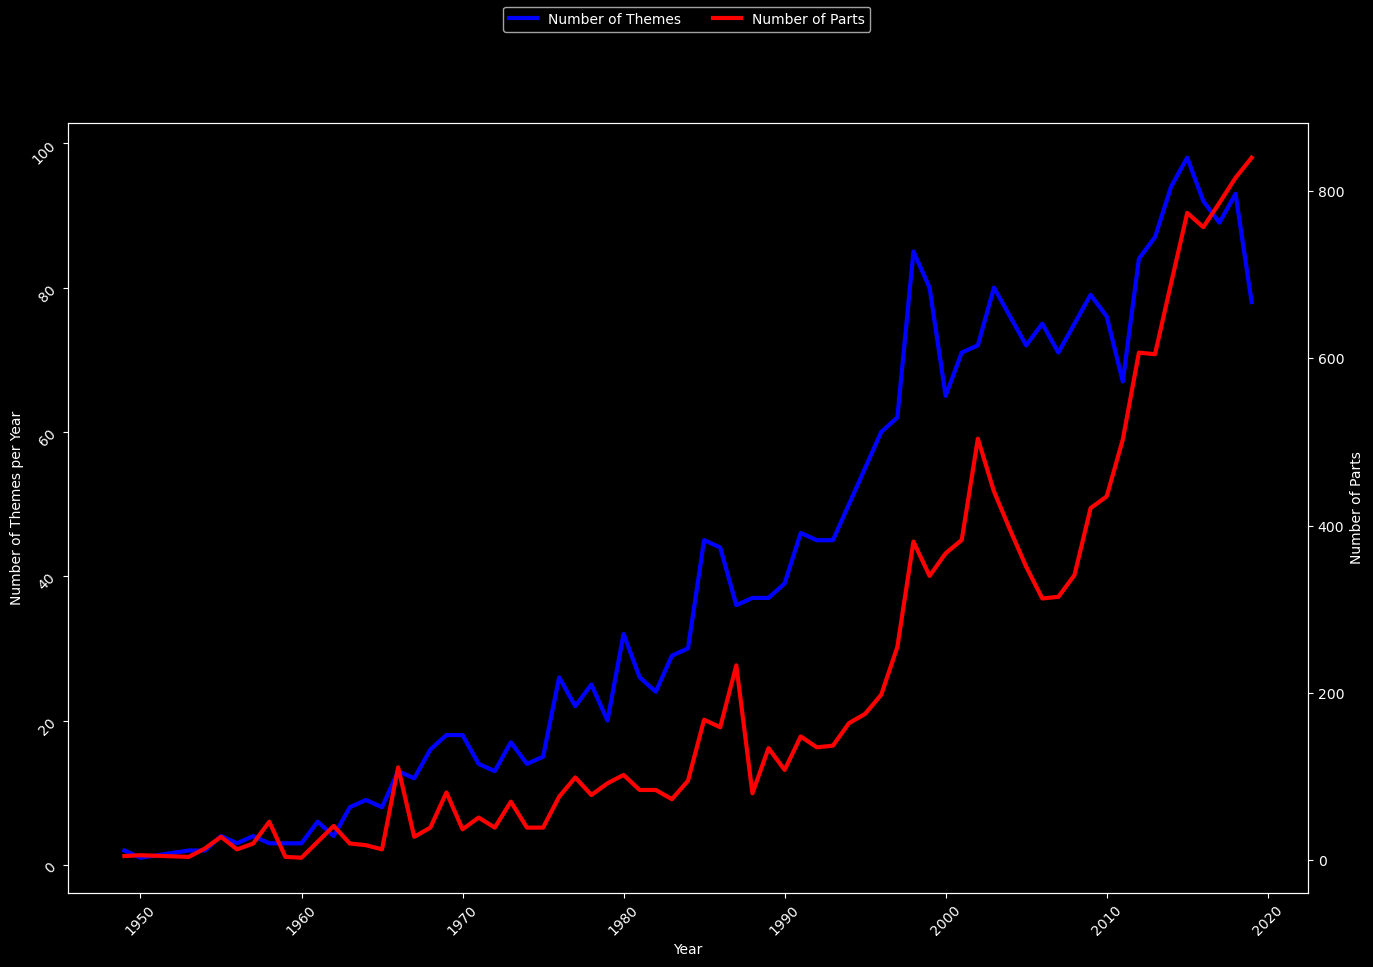

In [17]:
# Visualize the themes data

    # Creating the structure
plt.figure(figsize= (16, 10))
plt.xticks( fontsize= 10, rotation = 45 )
plt.yticks(fontsize= 10, rotation = 45 )

    # Create the extra axis
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx()

    # Create Graph
line1 = ax1.plot(themes_by_year.index[:-2],
         themes_by_year["theme_id"][:-2],
         linewidth = 3,
         label ="Number of Themes ",
         color ="b")
line2 = ax2.plot(sets_by_year.index[: -2],
         sets_by_year["num_parts"][: -2],
         linewidth = 3,
         label = "Number of Parts",
         color ="r")
    # Functionalities
ax1.set_xlabel("Year", fontsize= 10)
ax1.set_ylabel("Number of Themes per Year", fontsize = 10)
ax2.set_ylabel("Number of Parts", fontsize = 10)

fig = plt.gcf()
fig.legend(loc="upper center", ncol=2)


### Scatter plots

Create a Pandas Series called parts_per_set that has the year as the index and contains the average number of parts per LEGO set in that year.

In [21]:
parts_per_set = sets_df.groupby("year").agg({"num_parts": "mean"})
parts_per_set

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143
...,...
2017,221.840967
2018,213.618873
2019,207.510714


Create a scatter plot for the parts by year set

Text(0.5, 1.0, 'Average Number of Parts per Year')

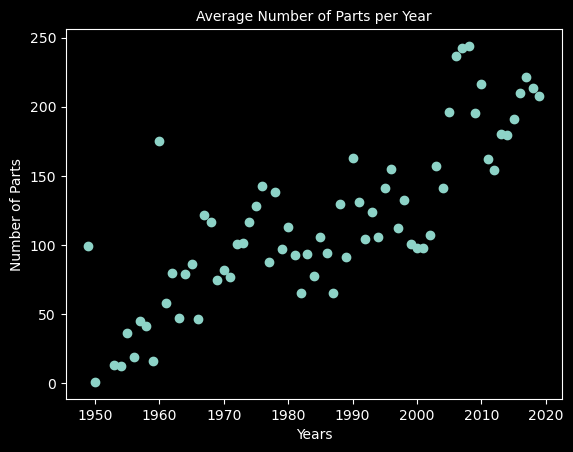

In [26]:
plt.scatter(parts_per_set.index[:-2],
            parts_per_set["num_parts"][:-2]
            )

plt.xlabel("Years", fontsize = 10)
plt.ylabel("Number of Parts", fontsize = 10)
plt.title("Average Number of Parts per Year", fontsize = 10)